# Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
pandas.__version__

'2.1.1'

### Parse Files

In [2]:
import json

FILES = [
    'leagues.json',
    'player.json',
    'teams.json',
    'tournaments.json',
]

def parse(filename):
    f = open(filename)
    data = json.load(f)
    f.close()
    return data

In [3]:
import pandas as pd

games = pd.DataFrame(parse('games.json'))
total = len(games)

games

,id,state,number,tournament_id,tournament_leagueId,tournament_name,tournament_slug,tournament_sport,tournament_startDate,tournament_endDate,...,blue_support,blue_top,red_top,red_jungle,red_mid,red_bottom,red_support,red_none,winner,is_forfeit
0,110733838936446929,completed,1,110733838935136200,109518549825754242,#2 Summer 2023,nacl_qualifiers_2_summer_2023,lol,2023-07-20,2023-08-15,...,107577680004170214,98926509821954141,110734375638473497,110734382304225523,110734389154290474,110734393683634460,110734399542284248,110734403894726628,blue,False
1,110733838936446930,completed,2,110733838935136200,109518549825754242,#2 Summer 2023,nacl_qualifiers_2_summer_2023,lol,2023-07-20,2023-08-15,...,110734399542284248,110734375638473497,98926509821954141,110536248987966005,107577680230859353,101383793885656347,107577680004170214,109981743659695659,red,False
2,110733838936446933,completed,1,110733838935136200,109518549825754242,#2 Summer 2023,nacl_qualifiers_2_summer_2023,lol,2023-07-20,2023-08-15,...,109783456115883308,NaN,107577678614544951,110536140884380252,107577678374651690,107577682684527120,110734303321604771,99101098222932482,blue,False
3,110733838936446934,completed,2,110733838935136200,109518549825754242,#2 Summer 2023,nacl_qualifiers_2_summer_2023,lol,2023-07-20,2023-08-15,...,109783456115883308,NaN,107577678614544951,110536140884380252,107577678374651690,107577682684527120,110734303321604771,99101098222932482,blue,False
4,110733838936446937,completed,1,110733838935136200,109518549825754242,#2 Summer 2023,nacl_qualifiers_2_summer_2023,lol,2023-07-20,2023-08-15,...,107577680004170214,98926509821954141,NaN,110734259501013637,107584075533635103,107577675890640640,109783456115883308,110734280504332124,blue,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24623,104237136865807907,completed,1,104237136838348356,101382741235120470,lla-closing-2020,lla-closing-2020,lol,2020-06-20,2020-09-06,...,NaN,105397186917489455,108443042455354918,98767975971974446,104266800049354578,105512438075390766,107583616307712318,107576831502041293,blue,False
24624,104237136865807908,completed,2,104237136838348356,101382741235120470,lla-closing-2020,lla-closing-2020,lol,2020-06-20,2020-09-06,...,107583616307712318,108443042455354918,105397186917489455,99921042942435093,99566408333803032,99921042944629053,NaN,107581310368859515,red,False
24625,104237136865807909,completed,3,104237136838348356,101382741235120470,lla-closing-2020,lla-closing-2020,lol,2020-06-20,2020-09-06,...,NaN,105397186917489455,108443042455354918,98767975971974446,104266800049354578,105512438075390766,107583616307712318,107576831502041293,red,False
24626,104237136865807910,completed,4,104237136838348356,101382741235120470,lla-closing-2020,lla-closing-2020,lol,2020-06-20,2020-09-06,...,107583616307712318,108443042455354918,105397186917489455,99921042942435093,99566408333803032,99921042944629053,NaN,107581310368859515,blue,False


In [4]:
games.columns.to_list()

['id',
 'state',
 'number',
 'tournament_id',
 'tournament_leagueId',
 'tournament_name',
 'tournament_slug',
 'tournament_sport',
 'tournament_startDate',
 'tournament_endDate',
 'stage_name',
 'stage_type',
 'stage_slug',
 'section_name',
 'match_id',
 'match_type',
 'match_state',
 'match_mode',
 'match_strategy_type',
 'match_strategy_count',
 'total',
 'blue_id',
 'red_id',
 'blue_bottom',
 'blue_jungle',
 'blue_mid',
 'blue_none',
 'blue_support',
 'blue_top',
 'red_top',
 'red_jungle',
 'red_mid',
 'red_bottom',
 'red_support',
 'red_none',
 'winner',
 'is_forfeit']

## Red vs Blue

In [5]:
red = games[games['winner'] == 'red']
blue = games[games['winner'] == 'blue']

print("red:", len(red)/total * 100)
print("blue:", len(blue)/total * 100)

red: 47.97385090141302
blue: 52.02614909858697


### Cumulative Sum

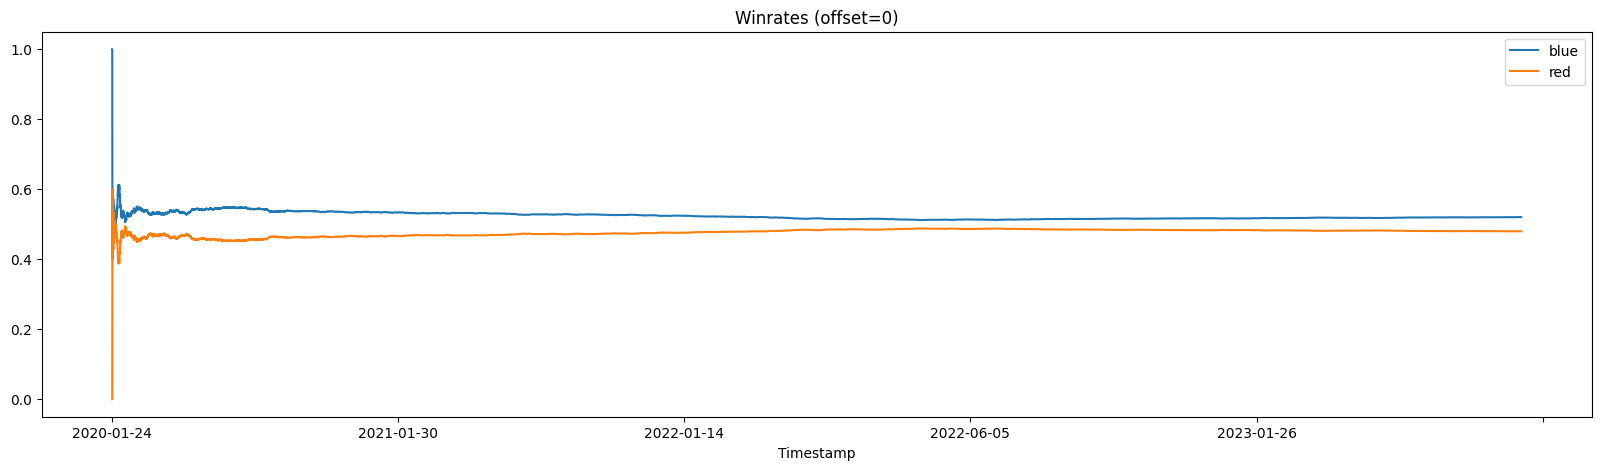

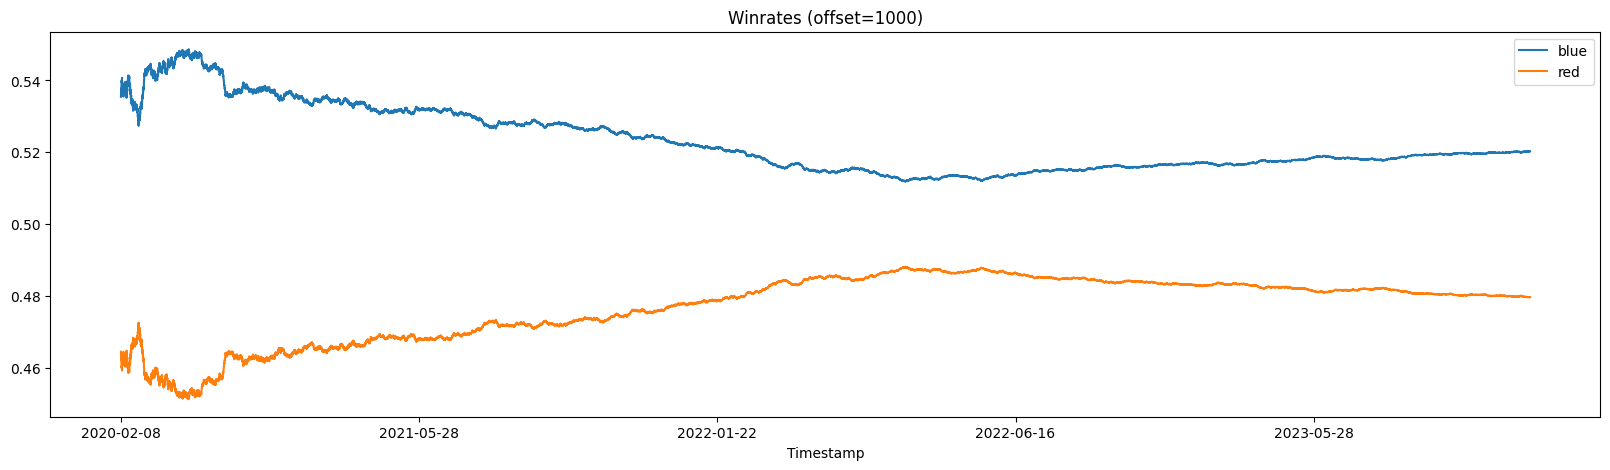

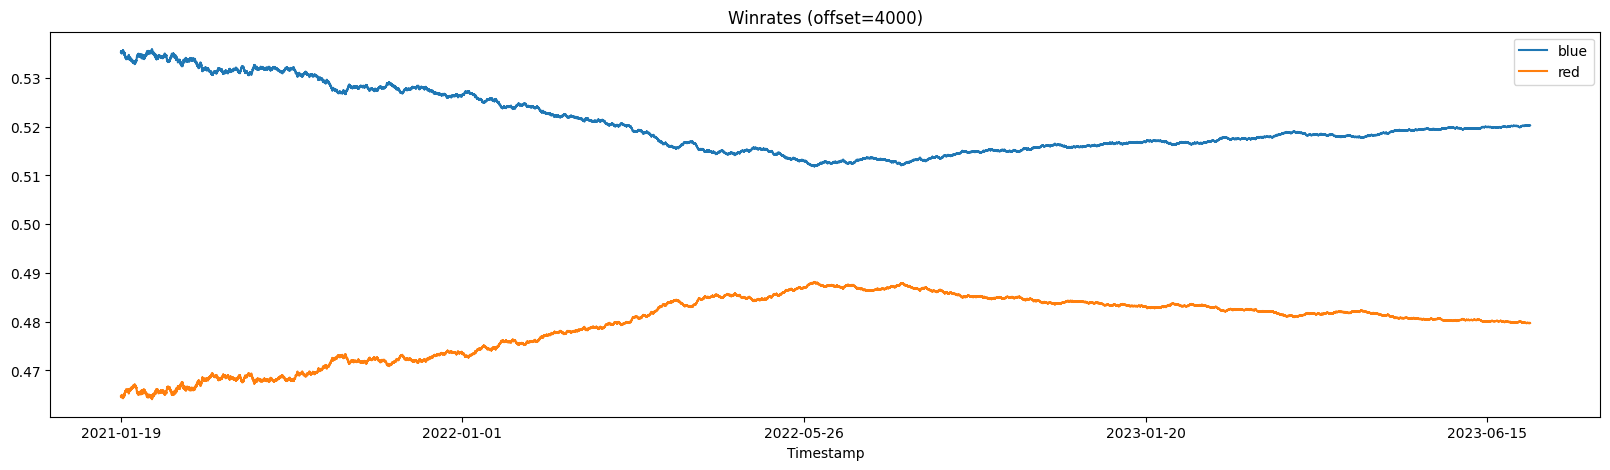

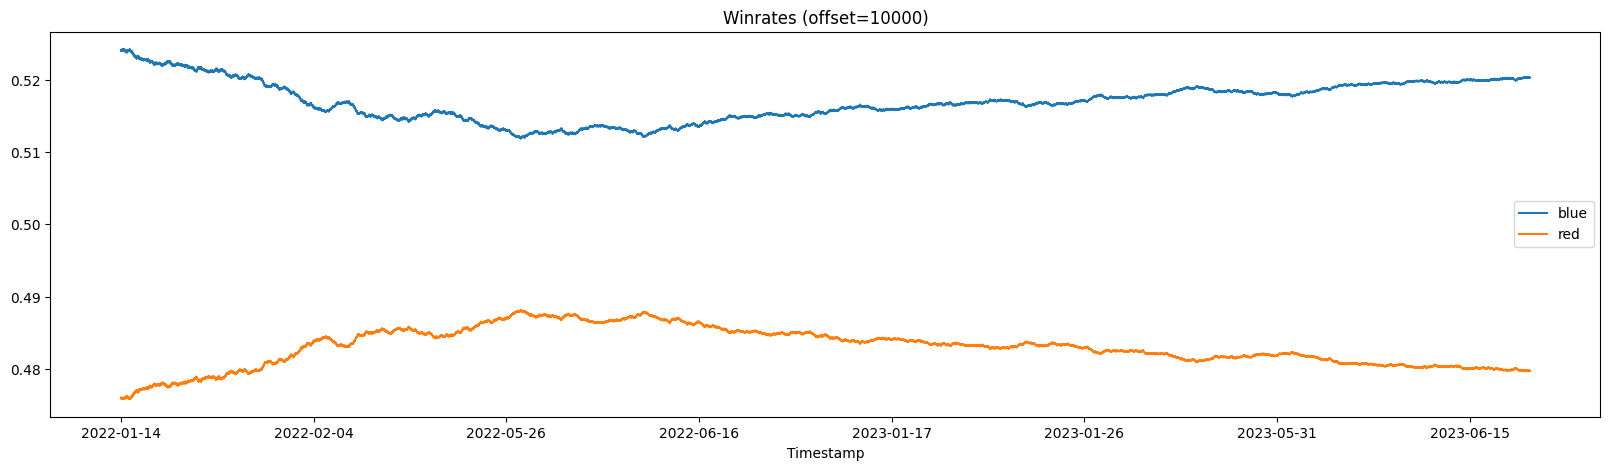

In [6]:
def winrate(games, side):
    wins = [1 if winner == side else 0 for winner in games["winner"]]
    cum = np.cumsum(wins)
    return [cum[i]/(i+1) for i in range(len(cum))]

sorted = games.sort_values(by="tournament_startDate")

offsets = [
    0,
    1000,
    4000,
    10000,
]

for offset in offsets:
    dates = sorted["tournament_startDate"][offset:]
    reds = winrate(sorted, "red")[offset:]
    blues = winrate(sorted, "blue")[offset:]

    winrates = pd.DataFrame({
        'blue': blues,
        'red': reds,
    }, index=dates)

    winrates.plot(title="Winrates (offset="+str(offset) + ")", xlabel="Timestamp", figsize=(20, 5))

### Window Sum

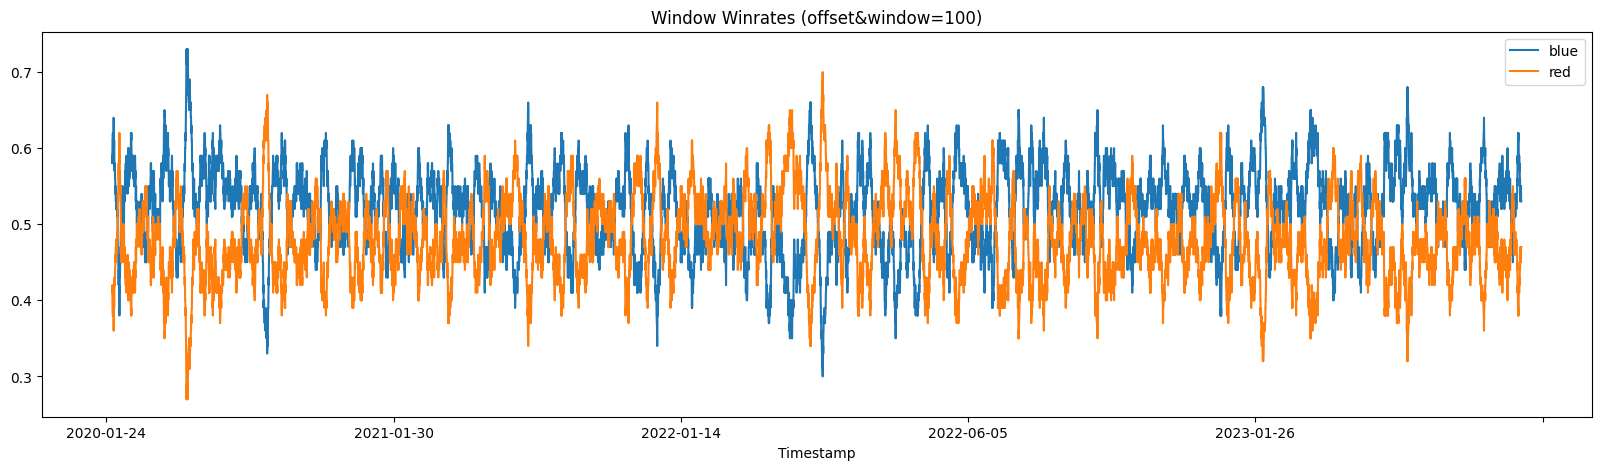

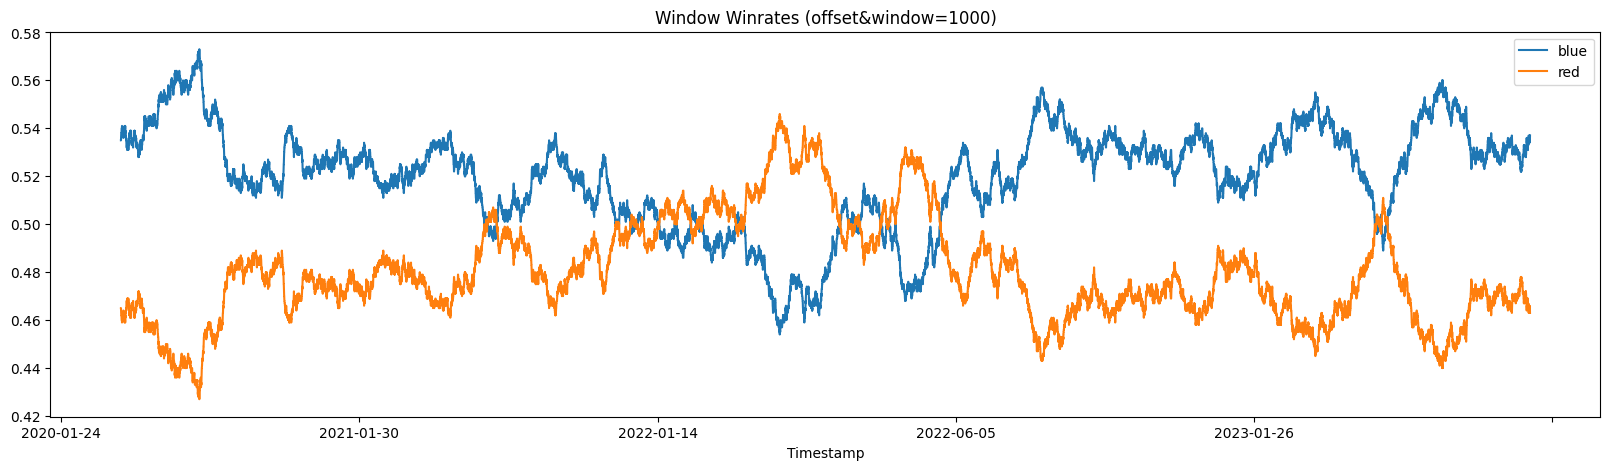

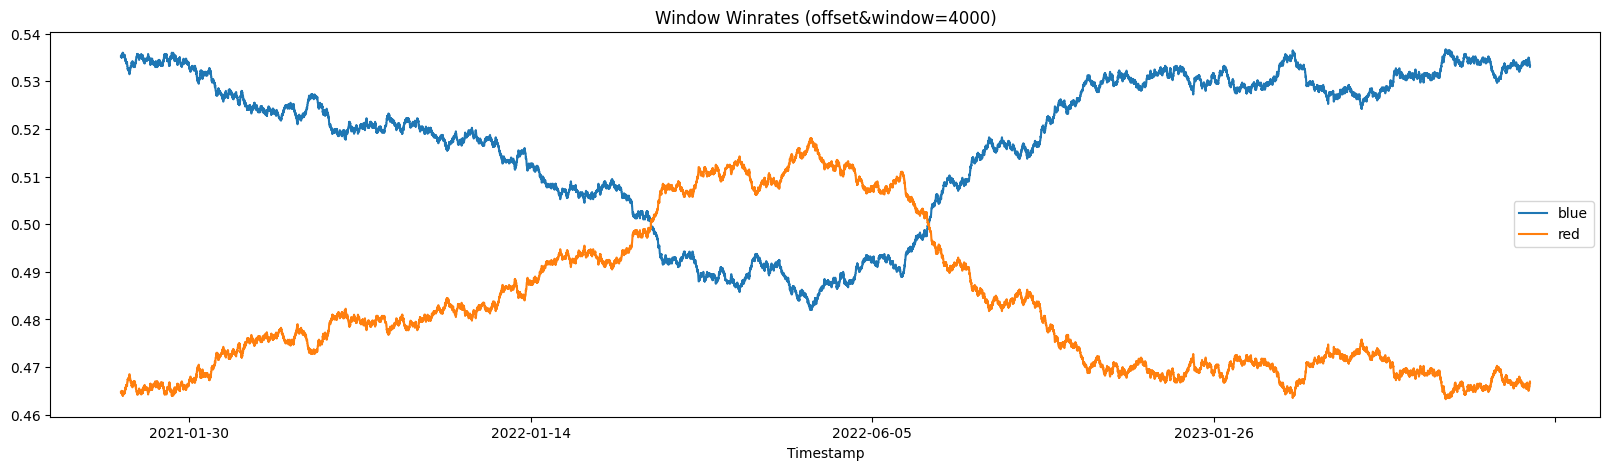

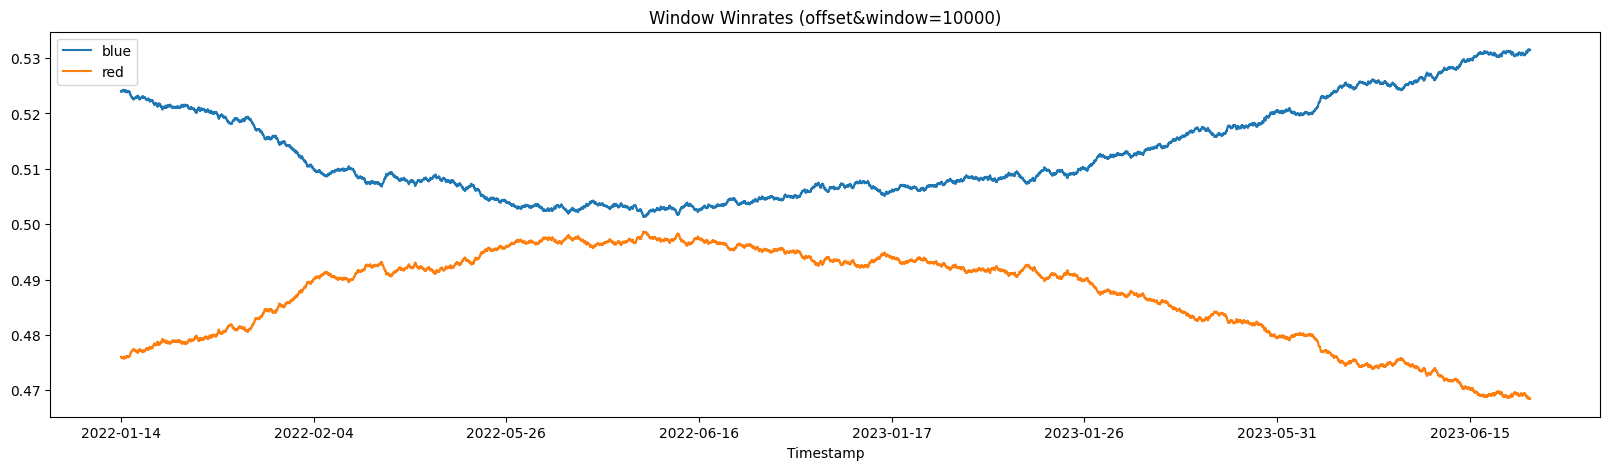

In [10]:
def winrate(games, side, window=1000):
    wins = [1 if winner == side else 0 for winner in games["winner"]]
    cum = np.cumsum(wins)
    cum[window:] = cum[window:] - cum[:-window]
    return [cum[i]/window for i in range(len(cum))]

sorted = games.sort_values(by="tournament_endDate")

offsets = [
    100,
    1000,
    4000,
    10000
]

for offset in offsets:
    dates = sorted["tournament_endDate"]
    reds = [None] * offset + winrate(sorted, "red", offset)[offset:]
    blues = [None] * offset + winrate(sorted, "blue", offset)[offset:]

    winrates = pd.DataFrame({
        'blue': blues,
        'red': reds,
    }, index=dates)

    winrates.plot(title="Window Winrates (offset&window="+str(offset) + ")", xlabel="Timestamp", figsize=(20, 5))

### Distribution of Sides Per Team

<Axes: title={'center': 'Cumalutive Bluerates (offset&window=1000)'}, xlabel='Timestamp'>

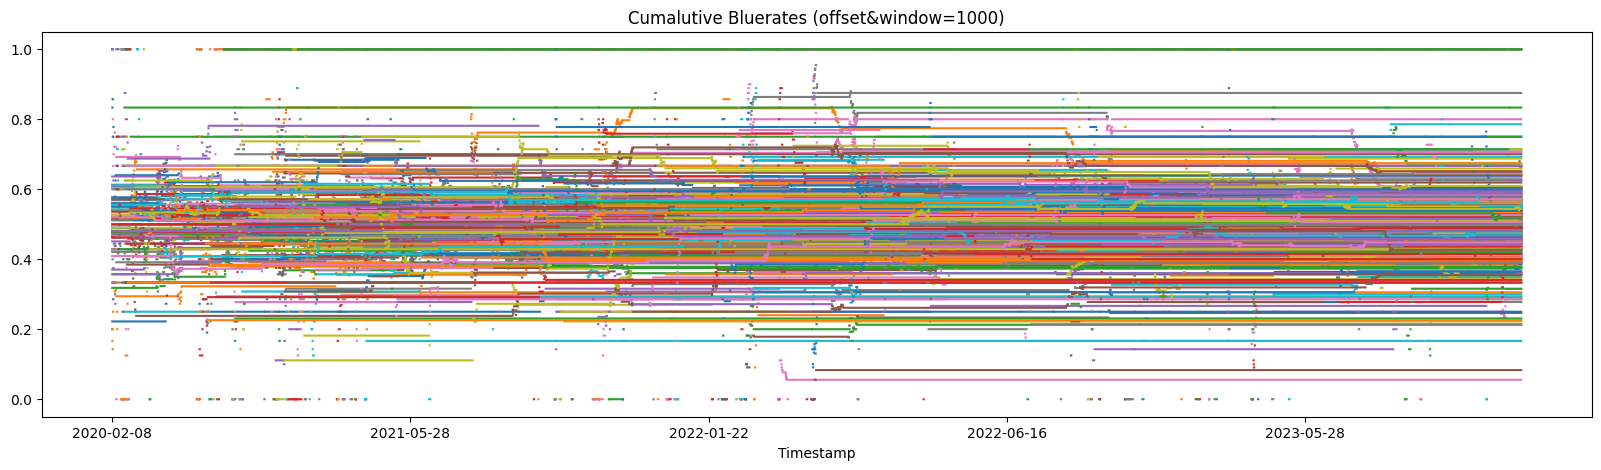

In [8]:
teams = pd.DataFrame(parse('data/teams.json'))
team_ids = [team for team in teams['team_id']]
team_ids

def bluerate(games, team_id, offset=1000):
    blues = [1 if blue_id == team_id  else 0 for blue_id in games["blue_id"]]
    cum_blues = np.cumsum(blues)
    # cum_blues[window:] = cum_blues[window:] - cum_blues[:-window]

    reds = [1 if red_id == team_id else 0 for red_id in games['red_id']]
    cum_reds = np.cumsum(reds)
    # cum_reds[window:] = cum_reds[window:] - cum_reds[:-window]

    played = cum_blues + cum_reds
    # played[window:] = played[window:] - played[:-window]

    bluerates = [cum_blues[i]/played[i] if played[i] != 0 else None for i in range(len(played))]

    count = 0
    last = None
    for i in range(len(bluerates)):
        if last and played[i] != last:
            count += 1
            bluerates[i] = None
        if count > offset:
            break
        last = played[i]

    return bluerates

sorted = games.sort_values(by="tournament_startDate")

offset = 1000
threshold = 0.01

dates = sorted["tournament_startDate"][offset:]

rates = {}
for team_id in team_ids:
    team_rate = bluerate(sorted, team_id, offset)[offset:]

    max = pd.DataFrame(team_rate).max()[0]
    min = pd.DataFrame(team_rate).min()[0]

    if (max and abs(max - 0.5) > threshold) or (min and abs(min - 0.5) > threshold ):
        rates[team_id] = team_rate

bluerates = pd.DataFrame(rates, index=dates)
bluerates.plot(title="Cumalutive Bluerates (offset&window="+str(offset) + ")", xlabel="Timestamp", figsize=(20, 5), legend=False)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))